In [1]:
%pylab inline
from sklearn.naive_bayes import GaussianNB
from distribuciones import paralelo, diagonal, espirales_anidadas
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from random import sample
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


3) Para el algoritmo Naive-Bayes con histogramas vamos a usar la implementacion de CategoricalNB de Sklearn. Para poder usarla primero tenemos que convertir nuestras variables continuas en categóricas, o sea en un histograma, usando un discretizador. Desarrolle una función que entrene un clasificador Naive-Bayes con histogramas, usando un conjunto de validación para determinar el número óptimo de bins del histograma. Las opciones para el clasificador y el discretizador son las siguientes:

In [6]:
df = pd.read_csv('../tp2/dos_elipses.data')
df.columns = ['x','y','clase']

x = df.iloc[:,:2]
clase = df.iloc[:,2]

In [11]:
# discretizador.bin_edges_  #ver limites del bineado

array([array([-0.498016 , -0.3982175, -0.298419 , -0.1986205, -0.098822 ,
               0.0009765,  0.100775 ,  0.2005735,  0.300372 ,  0.4001705,
               0.499969 ])                                               ,
       array([-4.999690e-01, -4.000545e-01, -3.001400e-01, -2.002255e-01,
              -1.003110e-01, -3.965000e-04,  9.951800e-02,  1.994325e-01,
               2.993470e-01,  3.992615e-01,  4.991760e-01])              ],
      dtype=object)

In [53]:
bins = 5
discretizador = KBinsDiscretizer(n_bins = bins, encode='ordinal',strategy='uniform')
discretizador.fit(x)
x_discreto = discretizador.transform(x)

clf = CategoricalNB(min_categories=bins)
clf.fit(x_discreto,clase)


CategoricalNB(min_categories=5)

In [49]:
array = np.zeros([5,5])
for i in discretizador.transform(x):
    binx = int(i[0])
    biny = int(i[1])
    
    array[binx,biny] = array[binx,biny] + 1 

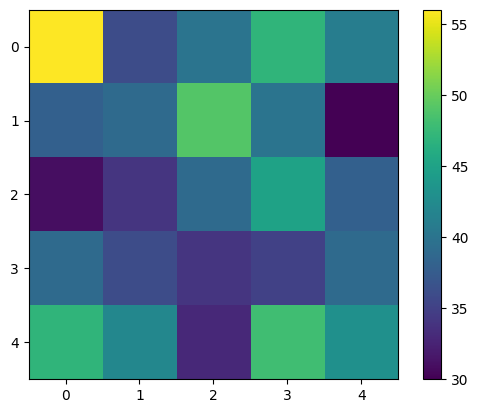

In [50]:
plt.imshow(array)
plt.colorbar()

In [ ]:
def NBfunction(bins,x_train,y_train,x_val,y_val,x_test,y_test):
    
    # convierto variables
    discretizador = KBinsDiscretizer(n_bins = bins, encode='ordinal',strategy='uniform')
    discretizador.fit(x_train)
    
    
    

bins=5

discretizador = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')


#código propio


clf = CategoricalNB(min_categories=bins)

clf.fit(X_discreto,y_train)

mas codigo propio


La función es similar a la que hicieron para entrenar redes. Tiene que recibir los conjuntos de entrenamiento, validación y test, el discretizador y el clasificador, y los valores a probar del número de bins, y tiene que devolver los errores para hacer curvas de error versus número de bins, y el discretizador y el clasificador óptimo entrenados.